# Procesamiento en pixel a pixel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import cv2

from img_utils import *

%matplotlib inline

## Histograma

Cantidad de repeticiones de un valor de intensidad, en la imagen.

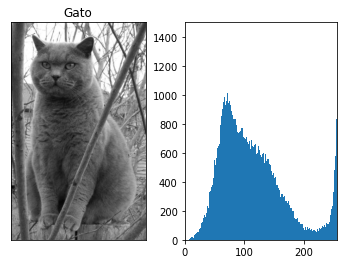

In [2]:
imgCat_gray = cv2.imread('./data/img/cat1.jpg', 0)
plt_cv_image(imgCat_gray, title='Gato', hist=True, max_hist=1500)

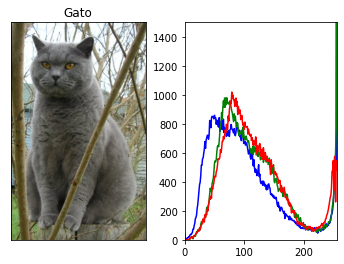

In [3]:
imgCat_RGB = cv2.imread('./data/img/cat1.jpg')
plt_cv_image(imgCat_RGB, title='Gato', hist=True, max_hist=1500)

## Operadores píxel a píxel

La forma más sencilla de procesar una imagen. El valor de un píxel es calculado únicamente a partir de el píxel correspondiente de la(s) imagen(es) de entrada. También conocido como *transformación de píxel*:

$$g(i, j)=h(f(i, j))$$

o:

$$g(i, j)=h(f_0(i,j), f_1(i, j), ...)$$

Donde $g()$ is the output image, $f()$ is the input images, and $h()$ the opeartor.

### Brillo y contraste

Transformación lineal

$$g(i,j)=\alpha f(i,j)+\beta$$

Donde:

* $\alpha$: ganancia, controla el *contraste* (relacionado con desviación estándar).
* $\beta$: desfase, controla el  *brillo* (relacionado con promedio).

$\alpha=1.0, \beta=70$

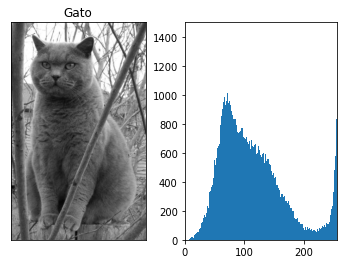

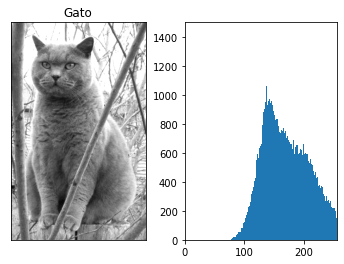

In [4]:
a=1.0
b=70
imgCat1 = np.uint8(np.clip(a*imgCat_gray+b, 0.0, 255.0))
plt_cv_image(imgCat_gray, title='Gato', hist=True, max_hist=1500)
plt_cv_image(imgCat1, title='Gato', hist=True, max_hist=1500)

* $\alpha=1.5, \beta=0$

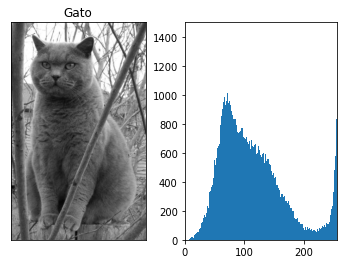

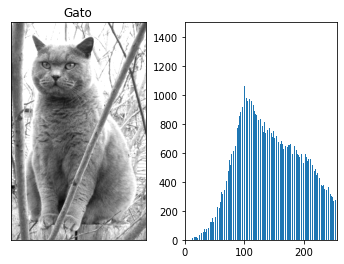

In [5]:
a=1.5
b=0
imgCat1 = np.uint8(np.clip(a*imgCat_gray+b, 0.0, 255.0))
plt_cv_image(imgCat_gray, title='Gato', hist=True, max_hist=1500)
plt_cv_image(imgCat1, title='Gato', hist=True, max_hist=1500)

* $\alpha=2.0, \beta=-50$

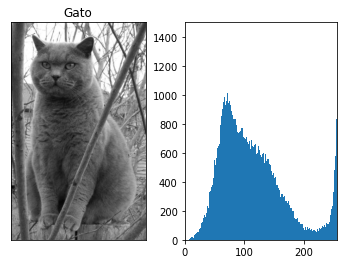

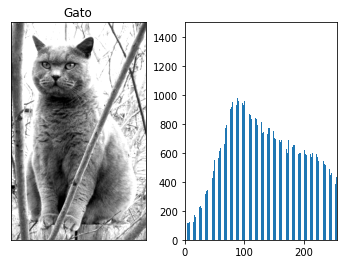

In [6]:
a=2.0
b=-50
imgCat1 = np.uint8(np.clip(a*imgCat_gray+b, 0.0, 255.0))
plt_cv_image(imgCat_gray, title='Gato', hist=True, max_hist=1500)
plt_cv_image(imgCat1, title='Gato', hist=True, max_hist=1500)

Los parámetros $\alpha$ y $\beta$ pueden depender de la posición del píxel: 

$$g(i,j) = a(i,j)f(v)+b(i,j)$$

Por ejemplo, el contraste puede arrancar en $1.0$ en la parte suprerior de la imagen, y empezar a disminuir hasta $0.0$ en la parte inferior.

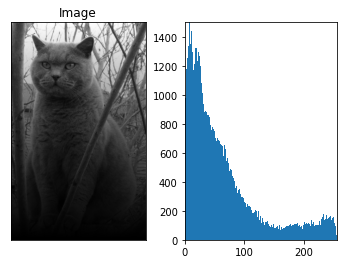

In [7]:
def linearGradient(img, dmin=0, dmax=255):
    pattern = np.transpose(np.array([np.arange(img.shape[0])]).repeat(img.shape[1],0)/img.shape[0])
    pattern = np.flip(pattern)
    return np.uint8(np.clip(pattern*img, dmin, dmax-1))

imgCat1 = linearGradient(imgCat_gray)
plt_cv_image(imgCat1, hist=True, max_hist=1500)

### Principio de superpisición

Se cumplirá siempre que las transfrmaciones sean lineales

$$h(f_0+f_1) = h(f_0) + h(f_1)$$

### Blend

Combina dos imágenes:

$$g(i,j) = (1-\alpha)f_0(i,j)+\alpha f_1(i,j)$$

Donde $\alpha \in [0.0,0.1]$

Ejemplo:

In [8]:
def blend(img1, img2, alpha, dmin=0, dmax=255):
    return np.uint8(np.clip((1.0-alpha)*img1 + alpha*img2, dmin, dmax-1))

imgDog_gray = cv2.imread('./data/img/dog1.jpg', 0)

* $\alpha=0.5$

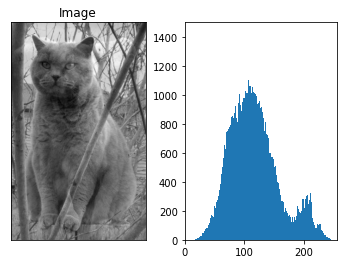

In [9]:
alpha = 0.25
img_out = blend(imgCat_gray, imgDog_gray, alpha)
plt_cv_image(img_out, hist=True, max_hist=1500)

* $\alpha=0.5$

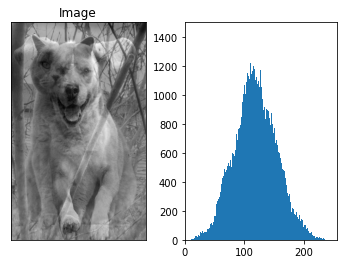

In [10]:
alpha = 0.5
img_out = blend(imgCat_gray, imgDog_gray, alpha)
plt_cv_image(img_out, hist=True, max_hist=1500)

* $\alpha=0.75$

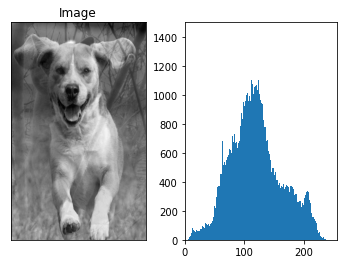

In [11]:
alpha = 0.75
img_out = blend(imgCat_gray, imgDog_gray, alpha)
plt_cv_image(img_out, hist=True, max_hist=1500)

* $\alpha$ cambiando a través de $x$

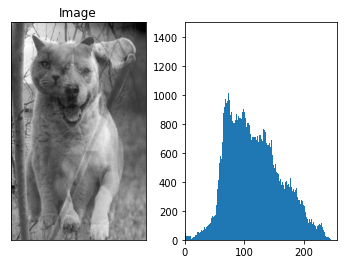

In [12]:
def linearBlend(img1, img2, dmin=0, dmax=255):
    pattern = np.array([np.arange(img1.shape[1])]).repeat(img1.shape[0],0)/img1.shape[1]
    return np.uint8(np.clip((-pattern+1)*img1 + pattern*img2, dmin, dmax-1))

img_out = linearBlend(imgCat_gray, imgDog_gray)
plt_cv_image(img_out, hist=True, max_hist=1500)

### Corrección Gamma

Usada para corregir el mapeo gamma que algunas cámaras aplican a la imagen.

Si la imagen está en el rango $[0.0,0.1]$, se puede aplicar así:

$$g(\mathbf{x}) = f(\mathbf{x})^{\frac{1}{\gamma}}$$

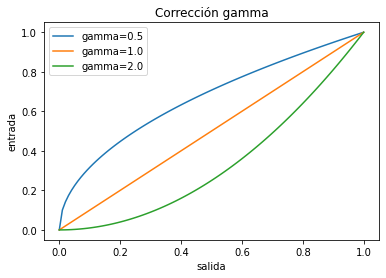

In [13]:
x = np.linspace(0,1,100)
y1 = x**0.5; y2 = x**1.0; y3 = x**2
plt.plot(x,y1, label='gamma=0.5')
plt.plot(x,y2, label='gamma=1.0')
plt.plot(x,y3, label='gamma=2.0')
plt.title('Corrección gamma')
plt.ylabel('entrada')
plt.xlabel('salida')
plt.legend()
plt.show()

Example:

* $\gamma=[1.0, 0.8, 2.2]$

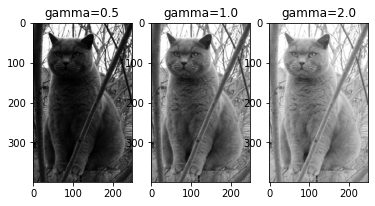

In [14]:
def gammaCorrection(img, gamma, dmin=0, dmax=255):
    return np.uint8(np.clip(((img/dmax)**(1.0/gamma))*dmax, dmin, dmax-1))
plt.subplot(1, 3, 1)
plt.imshow(gammaCorrection(imgCat_gray, 0.5), cmap = 'gray')
plt.title('gamma=0.5')
plt.subplot(1, 3, 2)
plt.imshow(gammaCorrection(imgCat_gray, 1.0), cmap = 'gray')
plt.title('gamma=1.0')
plt.subplot(1, 3, 3)
plt.imshow(gammaCorrection(imgCat_gray, 2.0), cmap = 'gray')
plt.title('gamma=2.0')
plt.show()

### Negativo

$$g(i,j) = L-f(i,j)-1$$

Ejemplo:

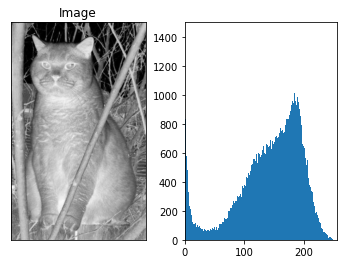

In [15]:
def negative(img, dmin=0, dmax=255):
    return np.uint8(np.clip(-img+dmax, dmin, dmax-1))

img_out = negative(imgCat_gray)
plt_cv_image(img_out, hist=True, max_hist=1500)

## RGB a escala de grises

*OpenCV* hace la transformación:

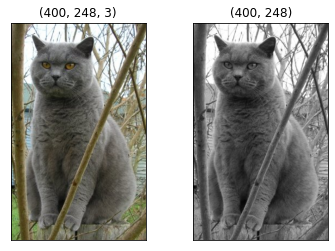

In [24]:
imgCat_RGB = cv2.imread('./data/img/cat1.jpg')
imgCat_gray = cv2.cvtColor(imgCat_RGB, cv2.COLOR_BGR2GRAY)
plt_multiple_cv_images([imgCat_RGB, imgCat_gray], [f'{imgCat_RGB.shape}', f'{imgCat_gray.shape}'])

Matemáticamente, se puede realizar una operación punto a punto, entre los tres canales:

$$f_{gray} = \frac{(f_R+f_G+f_B)}{3}$$

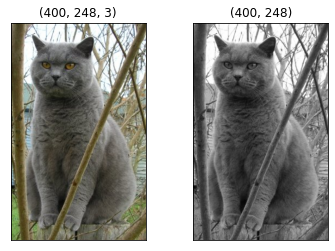

In [25]:
imgCat_gray = ( imgCat_RGB[...,0].astype(np.float64) + imgCat_RGB[...,1].astype(np.float64) + imgCat_RGB[...,2].astype(np.float64) )/3
imgCat_gray = imgCat_gray.astype('uint8')
plt_multiple_cv_images([imgCat_RGB, imgCat_gray], [f'{imgCat_RGB.shape}', f'{imgCat_gray.shape}'])

A pesar de dar un resultado aceptable, no suele ser el usado. La conversión realmente se suele hace así:

$$f_{gray} = 0.299 \cdot f_R + 0.587 \cdot f_G + 0.114 \cdot f_B$$

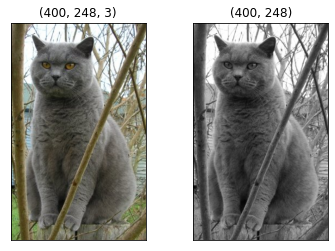

In [26]:
imgCat_gray = 0.299*imgCat_RGB[...,0].astype(np.float64) + 0.587*imgCat_RGB[...,1].astype(np.float64) + 0.114*imgCat_RGB[...,2].astype(np.float64)
imgCat_gray = imgCat_gray.astype('uint8')
plt_multiple_cv_images([imgCat_RGB, imgCat_gray], [f'{imgCat_RGB.shape}', f'{imgCat_gray.shape}'])

## Ecualización de Histograma

El histograma es una función de probabilidad, y la idea de ecualizarlo es volverlo una distribución uniforme. La transformación se puede hacer a través de la siguiente LUT:

$$c(I)=(L-1)\frac{1}{N}\sum^{i=0}_{I}{h(i)}$$

Where:
* $h$: Imagen Origional
* $c$: LUT

Considere la siguiente imagen y su histograma:

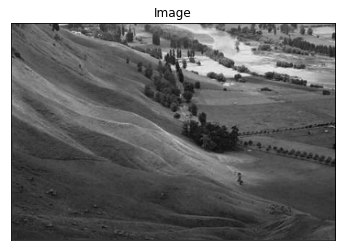

In [29]:
imgGray = cv2.imread('data/img/bad_contrast.png', 0)
plt_cv_image(imgGray)

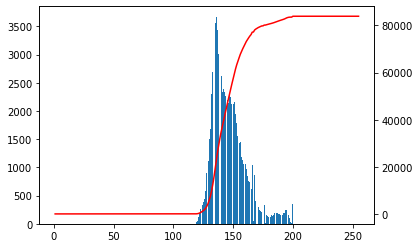

In [30]:
def plot_hist_and_cum(img):
    hist = np.histogram(img, bins=np.arange(256))
    fig, ax1 = plt.subplots()
    #ax1.fill_between(hist[1][1:], 0, hist[0])
    ax1.bar(hist[1][1:], hist[0])
    ax2 = ax1.twinx()
    ax2.plot(hist[1][1:], np.cumsum(hist[0]), color='red')
    
plot_hist_and_cum(imgGray)

Aplicando ecualizació de histograma:

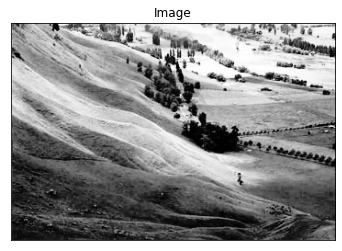

In [33]:
imgGrayEqu = cv2.equalizeHist(imgGray)
plt_cv_image(imgGrayEqu)

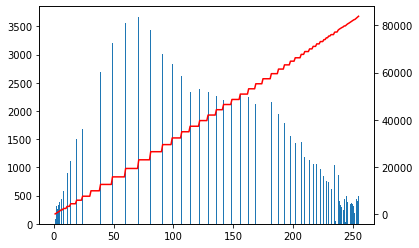

In [32]:
plot_hist_and_cum(imgGrayEqu)


Algunas veces la ecualización de histograma no presenta los resultados visuales esperados, por lo cual se hace blend con la imagen original:

<div class="picture">
  <img style="width:60%;" src ="res/img/1_eqblend.png" />
  <div>[Szeliski11]</div>
</div>

Otros métodos basados en regiones:

<div class="picture">
  <img style="width:60%;" src ="res/img/1_eqlocal.png" />
  <div>[Szeliski11]</div>
</div>

# Linear filtering (neighborhood operator)

Linear filters can be performed as a correlation operation:

$$g = f \otimes h$$

$$g(i,j) = \sum_{k,l}f(i+k, j+l)h(k,l)$$

Where $g$ is the filtered image, $f$ is the original image and $h$ is the filter, whose value are called *filter coefficients*, and **the sum of them must be *1.0***.

<div class="picture">
  <img style="width:90%;" src ="images/1_linear_filter.png" />
  <div>[Szeliski11]</div>
</div>

The linear filter can also be executed as a convolution operation:

$$g = f \ast h$$

$$g(i,j) = \sum_{k,l}f(i-k, j-l)h(k,l) = \sum_{k,l}f(k, l)h(i-k,j-l)$$

Correlation and convolution are shift-invariant operations, but a shift-variant version could be used:

$$g(i,j) = \sum_{k,l}f(i-k, j-l)h(k,l;i,j)$$


## Padding (border effect)

When border pixel are calculated, the filter need pixels that outside the image, there are some processes to face this problem:

* ***zero***: read the outside pixels as zero.
* ***constant***: read the outside pixels as a specific value, usually L/2.
* ***clamp***: repeat the border pixels.
* ***wrap***: loop “around” the image in a “toroidal” configuration.
* ***mirror***: reflect the image.

<div class="picture">
  <img style="width:90%;" src ="images/1_padding.png" />
  <div>[Szeliski11]</div>
</div>

## Typical filters

### Average (mean) filter

It is an squared filter with the same value in all its cells, and whose sum is 1.0.

In [ ]:
from scipy import signal

def mean_filter(img, N):
    kernel = np.ones((N,N))/(N*N)
    return signal.convolve2d(imgFace1, kernel, boundary='symm', mode='same')

imgFace1 = cv2.imread('images/1_face1.jpg', 0)
fig=plt.figure(figsize=(18, 16), dpi= 80)
plt.subplot(141)
plot_image(imgFace1)
plt.title('Original')

sizes = [3, 5, 7]

for i, size in enumerate(sizes):
    plt.subplot(142+i)
    filtered = mean_filter(imgFace1, size)
    plot_image(filtered)
    plt.title(f'{size}x{size} Filter')

Original image from https://homepages.inf.ed.ac.uk/rbf/HIPR2/filtops.htm

In [ ]:
imgFace1 = cv2.imread('images/1_face2.jpg', 0)
fig=plt.figure(figsize=(18, 16), dpi= 80)
plt.subplot(141)
plot_image(imgFace1)
plt.title('Original')

sizes = [3, 5]

for i, size in enumerate(sizes):
    plt.subplot(142+i)
    filtered = mean_filter(imgFace1, size)
    plot_image(filtered)
    plt.title(f'{size}x{size} Filter')

Original image from https://homepages.inf.ed.ac.uk/rbf/HIPR2/filtops.htm

### Gaussian filter

Modeled by:

$$G(x, y) = \frac{1}{2 \pi \sigma^2} e ^ {-\frac{x^2 + y^2}{2 \sigma^2}}$$

<div class="picture">
  <img style="width:35%;" src ="images/1_gauss_plot.png" />
</div>

Values example:

<div class="picture">
  <img style="width:25%;" src ="images/1_gauss_table.png" />
</div>

Implementation:

In [ ]:
from scipy.ndimage import gaussian_filter

imgRobot = cv2.imread('images/1_camera.jpg', 0)
fig=plt.figure(figsize=(18, 16), dpi= 70)
plt.subplot(161)
plot_image(imgRobot)
plt.title('Original')

sigmas = [1, 2, 3, 4, 5]

for i, sigma in enumerate(sigmas):
    plt.subplot(162+i)
    filtered = result = gaussian_filter(imgRobot, sigma=sigma)
    plot_image(filtered)
    plt.title(f'sigma={sigma}')



### Sobel filters

Gradients in $x$ and $y$ are calculated.

<div class="picture">
  <img style="width:50%;" src ="images/1_sobel_eq.png" />
</div>

Then, the magnitude and direction can be computed:

<div class="picture">
  <img style="width:15%;" src ="images/1_sobel_mg.png" />
  <img style="width:15%;" src ="images/1_sobel_ph.png" />
</div>

In [ ]:
imgSobel1 = cv2.imread('images/1_sobel1.png', 0)
gx = cv2.Sobel(imgSobel1, cv2.CV_32F, 1, 0)
gy = cv2.Sobel(imgSobel1, cv2.CV_32F, 0, 1)
mag, ang = cv2.cartToPolar(gx, gy)

fig=plt.figure(figsize=(18, 16), dpi= 70)

plt.subplot(131)
plot_image(imgSobel1); plt.title('Original')
plt.subplot(132)
plot_image(gx); plt.title('Gx')
plt.subplot(133)
plot_image(gy); plt.title('Gy')

In [ ]:
fig=plt.figure(figsize=(18, 16), dpi= 70)

plt.subplot(131)
plot_image(mag); plt.title('Magnitude')
plt.subplot(132)
plot_image(255*ang/ang.max()); plt.title('Phase')